# Portfolio Methodolgy

1. DGI - Rebalance every 6 months picking around 10 - 30 names from CA and US universe
    - Add names slowly, 2-3 names a month
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: MU AMD MSFT TTWO
    - AMD Earnings: Oct 22
    - MSFT Earnings: Oct 24
    - TTWO Earnings: Nov 5
    - MU Earnings: Dec 17
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|DGI|15%|10/01/2018|11/01/2018|1/2/2019|
|VAA/PAA|15%|10/01/2018|11/01/2018|11/01/2018|
|LEAPs|1.5%|10/4/2018|10/22/2018|12/1/2018|
|Short Vol|2%|10/4/2018|10/5/2018|10/12/2018|
|Barbell Hedging|1.5%||||
|Treasuries|60%|10/4/2018|10/24/2018|10/5/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [1]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from new_earnings_setup import *

os.chdir(main_dir)

C:\Users\Fang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



# Allocate Smartly Checking

In [ ]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

## Checking market correlations

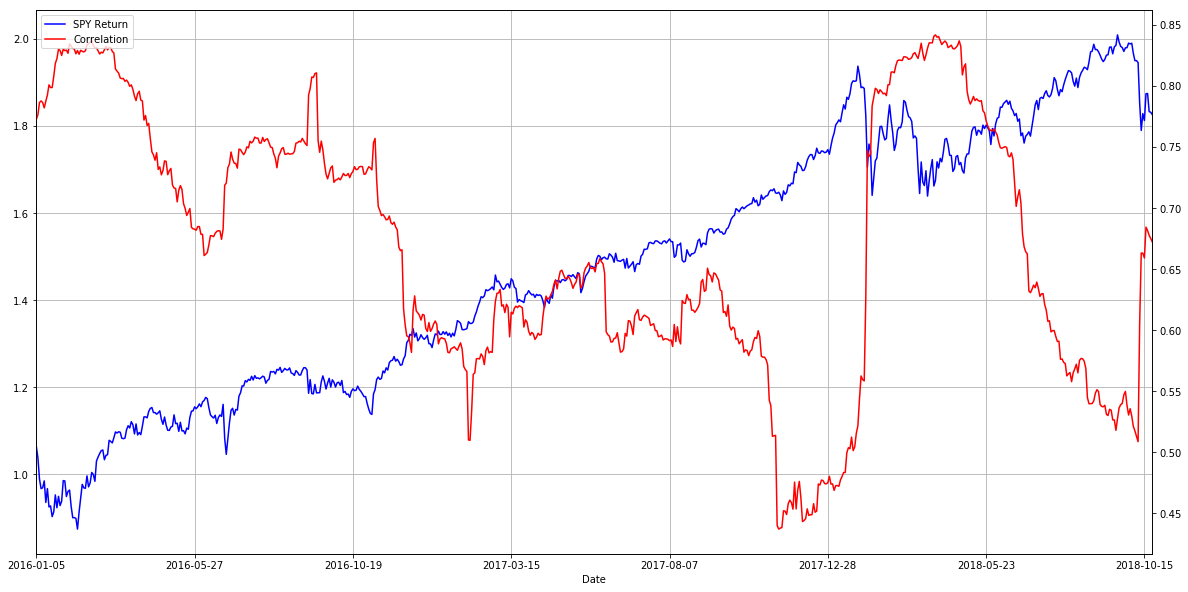

                XLRE       XLV       XLI       XLK       XLP       XLU  \
2018-10-16  0.532334  0.907499  0.780780  0.886814  0.536781  0.272353   
2018-10-17  0.537344  0.905306  0.775341  0.885260  0.535126  0.269248   
2018-10-18  0.507368  0.907377  0.782762  0.887985  0.516029  0.254611   
2018-10-19  0.504028  0.895893  0.791630  0.894617  0.481937  0.255667   
2018-10-22  0.496649  0.889268  0.797276  0.883629  0.486752  0.252390   

                 XLB       XLY       XLF       XLE  Avg_Corr   SPY_cum  
2018-10-16  0.667870  0.883684  0.754350  0.621229  0.684369  1.874055  
2018-10-17  0.663802  0.884840  0.744730  0.615506  0.681650  1.874568  
2018-10-18  0.664434  0.890901  0.761987  0.602676  0.677613  1.833056  
2018-10-19  0.670268  0.883996  0.760857  0.612355  0.675125  1.831518  
2018-10-22  0.672144  0.879160  0.754124  0.610808  0.672220  1.825983  


In [24]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [25]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLK,XLP,XLU,XLB,XLC,XLY,XLF,XLE
2018-10-16,0.017786,2.539683e-03,0.094980,0.028131,0.00476,0.043674,0.070930,-0.069243,-0.051041,-0.012346,-0.021938,-0.023415
2018-10-17,0.017967,-3.174603e-04,0.100754,0.020620,0.00014,0.048570,0.068938,-0.075227,-0.047238,-0.020487,-0.012066,-0.029569
2018-10-18,0.003267,-2.220446e-16,0.088263,0.003004,-0.01946,0.047199,0.070532,-0.085656,-0.064652,-0.039274,-0.028519,-0.034386
2018-10-19,0.002722,1.015873e-02,0.078364,-0.000683,-0.01988,0.071093,0.087268,-0.092153,-0.064852,-0.048667,-0.024863,-0.042949
2018-10-22,0.000762,1.269841e-03,0.069880,-0.000819,-0.00910,0.064630,0.081889,-0.096170,-0.063251,-0.042584,-0.043144,-0.053385


## Earnings

**Key modules to run**
- new_earnings_setup.py for given date in string form 'yyyy-mm-dd': this gives the latest input data for earnings_prediction
- earnings_prediction.py for determining position to take on earnings name

In [21]:
date_lookup = '2018-10-23'
file_date = '2018-10-20'
return_bounds = 0.03
test_size = 0.8

predictions, earnings_rets = predict_earnings(date_lookup, file_date, return_bounds, test_size)

Accepted: MMM
0.78% Completed
0 total failures
Accepted: MANH
1.56% Completed
0 total failures
Accepted: ABG
2.34% Completed
0 total failures
Accepted: AI
3.12% Completed
0 total failures
Accepted: ASTE
3.91% Completed
0 total failures
Accepted: ARCH
4.69% Completed
0 total failures
Accepted: KS
5.47% Completed
0 total failures
Accepted: ALKS
6.25% Completed
0 total failures
Accepted: JBLU
7.03% Completed
0 total failures
Accepted: AGR
7.81% Completed
0 total failures
Accepted: ARR
8.59% Completed
0 total failures
Accepted: AXE
9.38% Completed
0 total failures
Accepted: AVY
10.16% Completed
0 total failures
Accepted: AMP
10.94% Completed
0 total failures
Accepted: BOFI
11.72% Completed
0 total failures
Accepted: ATI
12.50% Completed
0 total failures
Accepted: SHLM
13.28% Completed
0 total failures
Accepted: TBNK
14.06% Completed
0 total failures
Accepted: HFBC
14.84% Completed
0 total failures
Accepted: SMBC
15.62% Completed
0 total failures
Accepted: UCBI
16.41% Completed
0 total fail

In [19]:
predictions[(predictions['Expected Return'] != 0) &
            (predictions['CallTime'] == 'AC')]

,Underlying,sector,CallTime,IndustryBeta,MarketBeta,Stock52WeekReturn,SPY52WeekReturn,Industry52WeekReturn,Expected Return
2,ACC,Real Estate,AC,0.819764,0.446913,-0.079278,0.079988,-0.029286,0.03


In [20]:
earnings_report('ACC')

,ACC,ACC_closeToOpen,Real Estate Beta,MarketBeta,ACC_52WeekReturn,SPY_52WeekReturn,XLRE_52WeekReturn
2016-07-25,AC,0.017544,NaN,NaN,NaN,NaN,NaN
2016-10-24,AC,0.007434,0.888124,0.485316,0.284778,0.042737,0.004833
2017-02-21,AC,-0.004978,0.682853,0.023145,0.137062,0.224427,0.095604
2017-04-24,AC,-0.001623,0.806694,0.265200,0.131387,0.122601,0.040755
2017-07-24,AC,-0.008173,0.715351,0.252132,-0.059862,0.141536,-0.055329
2017-10-23,AC,-0.025081,0.487480,0.130174,-0.143194,0.202123,0.035104
2018-02-20,AC,-0.001968,0.826967,0.453213,-0.258370,0.163557,-0.020121
2018-04-23,AC,0.004741,0.786698,0.439959,-0.233125,0.132872,-0.068434
2018-07-23,AC,-0.018434,0.622838,0.312218,-0.139906,0.131849,0.003706
2018-10-22,AC,NaN,0.819764,0.446913,-0.079278,0.079988,-0.029286


## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 5, 0.05, 2, 50)

In [ ]:
ratios[(ratios.DTE >= 7)]